# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

# Import Data


* The data was retrieved from the [BioLINCC](https://biolincc.nhlbi.nih.gov/teaching/) website
* Data was obtained from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts which was collected during three examination periods, approximately 6 years apart, from roughly 1956 to 1968
* Missing values in the dataset are indicated by a period (.)
* Disclaimer: This is teaching data that has been rendered anonymous through the application of certain statistical processes such as permutations and/or random visit selection. We cannot claim or imply that any inferences derived from the teaching datasets are valid estimates

## Data Dictionary

|Variable|Description|Variable Type|Levels (if applicable)/<br> Notes|
| --- | --- |---|---|
|RANDID | Unique identification number for each participant|NA||
|SEX | Participant sex|Categorical|1=Men <br> 2=Women|
|PERIOD|Examination Cycle|Categorical|1=Period 1 <br> 2=Period 2 <br> 3=Period 3|
|AGE|Age at exam (years)|Continuous|
|SYSBP|Systolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|Continuous|
|DIABP|Diastolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|Continuous|
|BPMEDS|Use of Anti-hypertensive medication at exam|Categorical|0=Not currently used <br> 1=Current Use|
|CURSMOKE|Current cigarette smoking at exam|Categorical|0=Not current smoker <br> 1=Current smoker|
|CIGPDAY|Number of cigarettes smoked each day|Continuous|0=Not current smoker <br> 1-90 cigarettes per day|
|TOTCHOL|Serum Total Cholesterol (mg/dL)|Continuous|
|HDLC|High Density Lipoprotein Cholesterol (mg/dL)|Continuous|Available for period 3 only|
|LDLC|Low Density Lipoprotein Cholesterol (mg/dL)|Continuous|Available for period 3 only|
|BMI|Body Mass Index, weight in kilograms/height <br> meters squared|Continuous|
|GLUCOSE|Casual serum glucose (mg/dL)|Continuous|
|DIABETES|Diabetic according to criteria of first exam <br> treated or first exam with casual glucose <br> of 200 mg/dL or more|Categorical|0=Not a diabetic <br> 1=Diabetic|
|HEARTRTE|Heart rate (Ventricular rate) in beats/min|Continuous|
|PREVHYP|Prevalent Hypertensive. Subject was defined as <br> hypertensive if treated or if second exam at <br>which mean systolic was >=140 mmHg or mean<br>  Diastolic >=90 mmHg|Categorical|0=Free of disease <br> 1=Prevalent disease|
|ANYCHD|Angina Pectoris, <br> Myocardial infarction (Hospitalized and silent or unrecognized), <br>Coronary Insufficiency (Unstable Angina), <br> or Fatal Coronary Heart Disease|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|STROKE|Atherothrombotic infarction, <br>Cerebral Embolism, <br>Intracerebral Hemorrhage, <br> or Subarachnoid Hemorrhage, <br> or Fatal Cerebrovascular Disease|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|DEATH|Death from any cause|Categorical|0=Event did not occur during follow up <br> 1=Event occurred during followup|

In [2]:
framingham = pd.read_csv('/Users/silviacatalina/Google Drive/BethelTech/GitHub/wozU-DataSci/DS0110-FinalProject/Framingham/Data/csv/frmgham2.csv', na_values=".")
pd.options.display.max_columns = None
framingham.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,4.0,0,0,0,0,0,0,1,NaN,NaN,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,0.0,69.0,92.0,4.0,0,0,0,0,0,4628,3,31.0,178.0,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,2.0,0,0,0,0,0,0,1,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,2.0,0,0,0,0,0,2156,2,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,2.0,0,0,0,0,0,4344,3,54.0,141.0,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [3]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

# Data Wrangling

## Recode gender variable

In [4]:
def gender(series):
    if series == 2:
        return 0
    if series == 1:
        return 1
framingham['SEXR'] = framingham['SEX'].apply(gender)
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

## Selecting Columns of Interest

### List of original columns
RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,
PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,
TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP

In [5]:
framingham1 = framingham[['RANDID', 'SEXR', 'PERIOD', 'AGE', 'SYSBP', 'DIABP', 'BPMEDS', 'CURSMOKE', 
                          'CIGPDAY', 'TOTCHOL', 'HDLC', 'LDLC', 'BMI', 'GLUCOSE', 'DIABETES', 'HEARTRTE', 
                          'PREVHYP', 'ANYCHD', 'STROKE', 'DEATH']]
framingham1.head()

,RANDID,SEXR,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,1,39,106.0,70.0,0.0,0,0.0,195.0,NaN,NaN,26.97,77.0,0,80.0,0,1,0,0
1,2448,1,3,52,121.0,66.0,0.0,0,0.0,209.0,31.0,178.0,NaN,92.0,0,69.0,0,1,0,0
2,6238,0,1,46,121.0,81.0,0.0,0,0.0,250.0,NaN,NaN,28.73,76.0,0,95.0,0,0,0,0
3,6238,0,2,52,105.0,69.5,0.0,0,0.0,260.0,NaN,NaN,29.43,86.0,0,80.0,0,0,0,0
4,6238,0,3,58,108.0,66.0,0.0,0,0.0,237.0,54.0,141.0,28.50,71.0,0,80.0,0,0,0,0


In [6]:
framingham1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEXR      11627 non-null  int64  
 2   PERIOD    11627 non-null  int64  
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   BPMEDS    11034 non-null  float64
 7   CURSMOKE  11627 non-null  int64  
 8   CIGPDAY   11548 non-null  float64
 9   TOTCHOL   11218 non-null  float64
 10  HDLC      3027 non-null   float64
 11  LDLC      3026 non-null   float64
 12  BMI       11575 non-null  float64
 13  GLUCOSE   10187 non-null  float64
 14  DIABETES  11627 non-null  int64  
 15  HEARTRTE  11621 non-null  float64
 16  PREVHYP   11627 non-null  int64  
 17  ANYCHD    11627 non-null  int64  
 18  STROKE    11627 non-null  int64  
 19  DEATH     11627 non-null  int64  
dtypes: float64(10), int64(10)
me

### Subset data to periods 1, 2, 3; Remove NAs; Reset indexes
* Variables removed: PERIOD and HDLC, LDLC for periods 1 and 2

In [7]:
framinghamP1 = framingham1[framingham1['PERIOD'] == 1].copy()
framinghamP1.head()

,RANDID,SEXR,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,1,39,106.0,70.0,0.0,0,0.0,195.0,NaN,NaN,26.97,77.0,0,80.0,0,1,0,0
2,6238,0,1,46,121.0,81.0,0.0,0,0.0,250.0,NaN,NaN,28.73,76.0,0,95.0,0,0,0,0
5,9428,1,1,48,127.5,80.0,0.0,1,20.0,245.0,NaN,NaN,25.34,70.0,0,75.0,0,0,0,0
7,10552,0,1,61,150.0,95.0,0.0,1,30.0,225.0,NaN,NaN,28.58,103.0,0,65.0,1,0,1,1
9,11252,0,1,46,130.0,84.0,0.0,1,23.0,285.0,NaN,NaN,23.10,85.0,0,85.0,0,0,0,0


In [8]:
framinghamP1.drop(['PERIOD', 'HDLC', 'LDLC'], axis=1, inplace=True)
framinghamP1.dropna(inplace=True)
framinghamP1.reset_index(drop=True, inplace = True)
framinghamP1.head()

,RANDID,SEXR,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,2448,1,39,106.0,70.0,0.0,0,0.0,195.0,26.97,77.0,0,80.0,0,1,0,0
1,6238,0,46,121.0,81.0,0.0,0,0.0,250.0,28.73,76.0,0,95.0,0,0,0,0
2,9428,1,48,127.5,80.0,0.0,1,20.0,245.0,25.34,70.0,0,75.0,0,0,0,0
3,10552,0,61,150.0,95.0,0.0,1,30.0,225.0,28.58,103.0,0,65.0,1,0,1,1
4,11252,0,46,130.0,84.0,0.0,1,23.0,285.0,23.10,85.0,0,85.0,0,0,0,0


In [9]:
framinghamP2 = framingham1[framingham1['PERIOD'] == 2].copy()
framinghamP2.head()

,RANDID,SEXR,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
3,6238,0,2,52,105.0,69.5,0.0,0,0.0,260.0,NaN,NaN,29.43,86.0,0,80.0,0,0,0,0
6,9428,1,2,54,141.0,89.0,0.0,1,30.0,283.0,NaN,NaN,25.34,87.0,0,75.0,0,0,0,0
8,10552,0,2,67,183.0,109.0,0.0,1,20.0,232.0,NaN,NaN,30.18,89.0,0,60.0,1,0,1,1
10,11252,0,2,51,109.0,77.0,0.0,1,30.0,343.0,NaN,NaN,23.48,72.0,0,90.0,0,0,0,0
13,11263,0,2,49,177.0,102.0,1.0,0,0.0,230.0,NaN,NaN,31.36,86.0,0,120.0,1,1,0,0


In [10]:
framinghamP2.drop(['PERIOD', 'HDLC', 'LDLC'], axis=1, inplace=True)
framinghamP2.dropna(inplace=True)
framinghamP2.reset_index(drop=True, inplace = True)
framinghamP2.head()

,RANDID,SEXR,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,6238,0,52,105.0,69.5,0.0,0,0.0,260.0,29.43,86.0,0,80.0,0,0,0,0
1,9428,1,54,141.0,89.0,0.0,1,30.0,283.0,25.34,87.0,0,75.0,0,0,0,0
2,10552,0,67,183.0,109.0,0.0,1,20.0,232.0,30.18,89.0,0,60.0,1,0,1,1
3,11252,0,51,109.0,77.0,0.0,1,30.0,343.0,23.48,72.0,0,90.0,0,0,0,0
4,11263,0,49,177.0,102.0,1.0,0,0.0,230.0,31.36,86.0,0,120.0,1,1,0,0


In [11]:
framinghamP3 = framingham1[framingham1['PERIOD'] == 3].copy()
framinghamP3.head()

,RANDID,SEXR,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
1,2448,1,3,52,121.0,66.0,0.0,0,0.0,209.0,31.0,178.0,NaN,92.0,0,69.0,0,1,0,0
4,6238,0,3,58,108.0,66.0,0.0,0,0.0,237.0,54.0,141.0,28.50,71.0,0,80.0,0,0,0,0
11,11252,0,3,58,155.0,90.0,0.0,1,30.0,NaN,NaN,NaN,24.61,NaN,0,74.0,1,0,0,0
14,11263,0,3,55,180.0,106.0,1.0,0,0.0,220.0,46.0,135.0,31.17,81.0,1,86.0,1,1,0,0
19,12806,0,3,57,110.0,46.0,0.0,1,30.0,320.0,34.0,286.0,22.02,87.0,0,75.0,0,0,0,0


In [12]:
framinghamP3.drop(['PERIOD', 'HDLC', 'LDLC'], axis=1, inplace=True)
framinghamP3.dropna(inplace=True)
framinghamP3.reset_index(drop=True, inplace = True)
framinghamP3.head()

,RANDID,SEXR,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,BMI,GLUCOSE,DIABETES,HEARTRTE,PREVHYP,ANYCHD,STROKE,DEATH
0,6238,0,58,108.0,66.0,0.0,0,0.0,237.0,28.50,71.0,0,80.0,0,0,0,0
1,11263,0,55,180.0,106.0,1.0,0,0.0,220.0,31.17,81.0,1,86.0,1,1,0,0
2,12806,0,57,110.0,46.0,0.0,1,30.0,320.0,22.02,87.0,0,75.0,0,0,0,0
3,14367,1,64,168.0,100.0,0.0,0,0.0,280.0,25.72,82.0,0,92.0,1,0,0,0
4,16365,1,55,173.0,123.0,1.0,0,0.0,211.0,29.11,85.0,0,75.0,1,0,0,0


## Setting variables with whole numbers to integers

In [13]:
framinghamP1.BPMEDS = framinghamP1.BPMEDS.astype(int)
framinghamP1.CIGPDAY = framinghamP1.CIGPDAY.astype(int)
framinghamP1.TOTCHOL = framinghamP1.TOTCHOL.astype(int)
framinghamP1.GLUCOSE = framinghamP1.GLUCOSE.astype(int)
framinghamP1.HEARTRTE = framinghamP1.HEARTRTE.astype(int)

In [14]:
framinghamP2.BPMEDS = framinghamP2.BPMEDS.astype(int)
framinghamP2.CIGPDAY = framinghamP2.CIGPDAY.astype(int)
framinghamP2.TOTCHOL = framinghamP2.TOTCHOL.astype(int)
framinghamP2.GLUCOSE = framinghamP2.GLUCOSE.astype(int)
framinghamP2.HEARTRTE = framinghamP2.HEARTRTE.astype(int)

In [15]:
framinghamP3.BPMEDS = framinghamP3.BPMEDS.astype(int)
framinghamP3.CIGPDAY = framinghamP3.CIGPDAY.astype(int)
framinghamP3.TOTCHOL = framinghamP3.TOTCHOL.astype(int)
framinghamP3.GLUCOSE = framinghamP3.GLUCOSE.astype(int)
framinghamP3.HEARTRTE = framinghamP3.HEARTRTE.astype(int)

# Confusion Matrix Basics
---

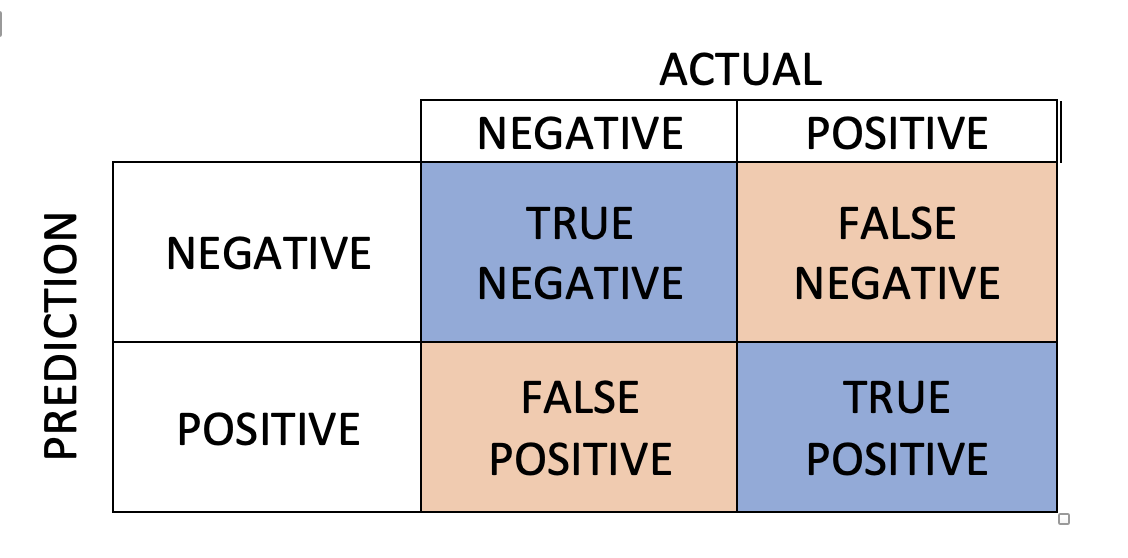

In [16]:
Image(filename ='/Users/silviacatalina/Google Drive/BethelTech/GitHub/FinalProject/Images/ConfusionMatrix.png', width=500)

### Notes:
* False Positives (FP) are the instances that the model predicts to be positive but are actually negative, a.k.a. **Type I error**
* False Negatives (FN) are the instances that the model predicts to be negative but are actually positive, a.k.a. **Type II error**
* **Precision** is the percentage of true positives (TP) out of all of the positives predicted (TP + FP)
* **Recall** is the percentage of true positives (TP) out of the total positive (TP + FN)
* When predicting coronary heart disease and/or death, we are looking for the false negatives to be as low as possible, so we'll be focusing on getting the highest recall possible, and not necessarily the highest precision

# Logistic Regression
---

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [18]:
LR = LogisticRegression(max_iter=2000)

# Heart Disease: Period 1

## Train Test Split

In [19]:
x = framinghamP1.drop(['RANDID', 'DIABP', 'ANYCHD','DEATH'], axis = 1) # drop DIABP due to multicolinearity
y = framinghamP1['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=76)

In [20]:
LR.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [21]:
y_pred = LR.predict(x_test)

In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[792  52]
 [257  78]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       844
           1       0.60      0.23      0.34       335

    accuracy                           0.74      1179
   macro avg       0.68      0.59      0.59      1179
weighted avg       0.71      0.74      0.69      1179



In [23]:
print(accuracy_score(y_test, y_pred))

0.7379134860050891


In [24]:
y_test.mean()

0.28413910093299405

## Feature Importance

In [25]:
feature_importances = pd.Series(LR.coef_[0], index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

SEXR        0.924631
DIABETES    0.496709
BPMEDS      0.355023
STROKE      0.167969
CURSMOKE    0.136594
BMI         0.051695
PREVHYP     0.041576
AGE         0.031891
SYSBP       0.011782
TOTCHOL     0.006162
CIGPDAY     0.003575
GLUCOSE     0.003399
HEARTRTE   -0.006555
dtype: float64


<AxesSubplot:>

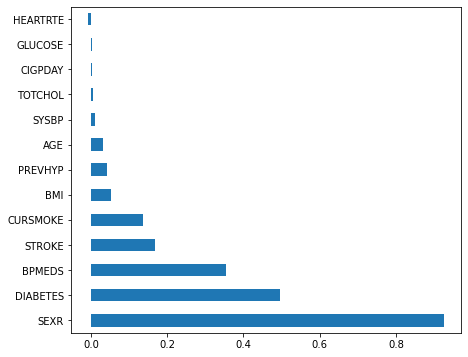

In [26]:
feature_importances.plot(kind='barh', figsize=(7,6))

# Heart Disease: Period 2

## Train Test Split

In [27]:
x = framinghamP2.drop(['RANDID', 'DIABP', 'ANYCHD','DEATH'], axis = 1)
y = framinghamP2['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=76)

In [28]:
LR.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [29]:
y_pred = LR.predict(x_test)

In [30]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[667  51]
 [222  53]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       718
           1       0.51      0.19      0.28       275

    accuracy                           0.73       993
   macro avg       0.63      0.56      0.55       993
weighted avg       0.68      0.73      0.68       993



In [31]:
print(accuracy_score(y_test, y_pred))

0.7250755287009063


## Feature Importance

In [32]:
feature_importances = pd.Series(LR.coef_[0], index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

SEXR        0.896306
DIABETES    0.852945
BPMEDS      0.615781
STROKE      0.288034
PREVHYP     0.214658
CURSMOKE    0.176601
BMI         0.038426
AGE         0.033125
SYSBP       0.011820
TOTCHOL     0.004578
CIGPDAY     0.000950
GLUCOSE    -0.002053
HEARTRTE   -0.003618
dtype: float64


<AxesSubplot:>

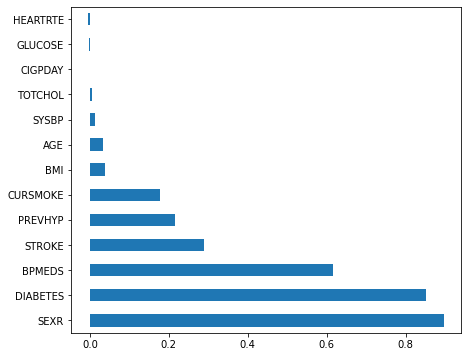

In [33]:
feature_importances.plot(kind='barh', figsize=(7,6))

# Heart Disease: Period 3

## Train Test Split

In [35]:
x = framinghamP3.drop(['RANDID', 'DIABP', 'ANYCHD','DEATH'], axis = 1)
y = framinghamP3['ANYCHD']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=76)

In [36]:
LR = LogisticRegression(max_iter=2000)

In [37]:
LR.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [38]:
y_pred = LR.predict(x_test)

In [39]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[500  28]
 [140  30]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       528
           1       0.52      0.18      0.26       170

    accuracy                           0.76       698
   macro avg       0.65      0.56      0.56       698
weighted avg       0.72      0.76      0.71       698



In [40]:
print(accuracy_score(y_test, y_pred))

0.7593123209169055


## Feature Importance

In [41]:
feature_importances = pd.Series(LR.coef_[0], index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

SEXR        0.900132
DIABETES    0.785875
PREVHYP     0.530801
BPMEDS      0.237192
STROKE      0.091339
AGE         0.050437
CIGPDAY     0.010192
BMI         0.008086
TOTCHOL     0.004714
GLUCOSE     0.001908
SYSBP       0.001832
HEARTRTE   -0.004670
CURSMOKE   -0.077946
dtype: float64


<AxesSubplot:>

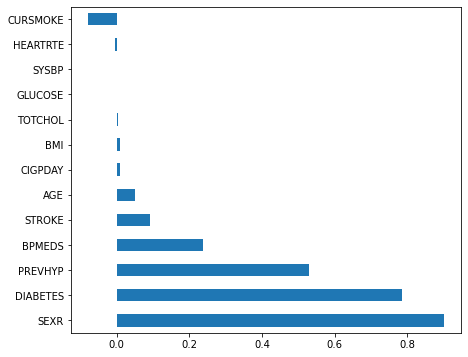

In [42]:
feature_importances.plot(kind='barh', figsize=(7,6))

# DEATH: Period 1

## Train Test Split

In [43]:
x = framinghamP1.drop(['RANDID', 'DIABP', 'DEATH'], axis = 1)
y = framinghamP1['DEATH']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=76)

In [44]:
LR.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [45]:
y_pred = LR.predict(x_test)

In [46]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[672  92]
 [165 250]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       764
           1       0.73      0.60      0.66       415

    accuracy                           0.78      1179
   macro avg       0.77      0.74      0.75      1179
weighted avg       0.78      0.78      0.78      1179



In [47]:
print(accuracy_score(y_test, y_pred))

0.7820186598812553


## Feature Importance

In [48]:
feature_importances = pd.Series(LR.coef_[0], index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

ANYCHD      1.124085
DIABETES    0.760843
STROKE      0.729796
SEXR        0.641245
PREVHYP     0.268688
BPMEDS      0.116717
AGE         0.101935
CURSMOKE    0.097879
CIGPDAY     0.017698
SYSBP       0.013599
HEARTRTE    0.006048
GLUCOSE     0.005339
TOTCHOL    -0.000937
BMI        -0.015375
dtype: float64


<AxesSubplot:>

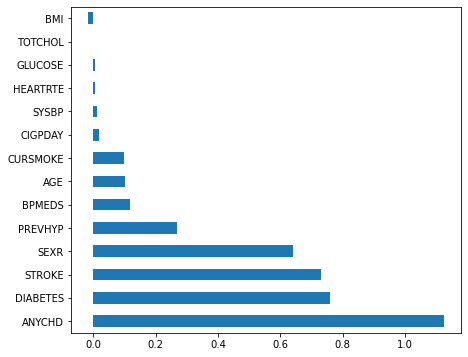

In [49]:
feature_importances.plot(kind='barh', figsize=(7,6))

# DEATH: Period 2

## Train Test Split

In [50]:
x = framinghamP2.drop(['RANDID', 'DIABP', 'DEATH'], axis = 1)
y = framinghamP2['DEATH']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=76)

In [51]:
LR.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [52]:
y_pred = LR.predict(x_test)

In [53]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[631  55]
 [156 151]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       686
           1       0.73      0.49      0.59       307

    accuracy                           0.79       993
   macro avg       0.77      0.71      0.72       993
weighted avg       0.78      0.79      0.77       993



In [54]:
print(accuracy_score(y_test, y_pred))

0.7875125881168177


## Feature Importance

In [55]:
feature_importances = pd.Series(LR.coef_[0], index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

ANYCHD      0.944316
SEXR        0.686311
STROKE      0.629270
DIABETES    0.601582
BPMEDS      0.577230
CURSMOKE    0.240210
AGE         0.101661
PREVHYP     0.028449
SYSBP       0.012286
CIGPDAY     0.009853
HEARTRTE    0.002851
GLUCOSE     0.001957
TOTCHOL    -0.003115
BMI        -0.015948
dtype: float64


<AxesSubplot:>

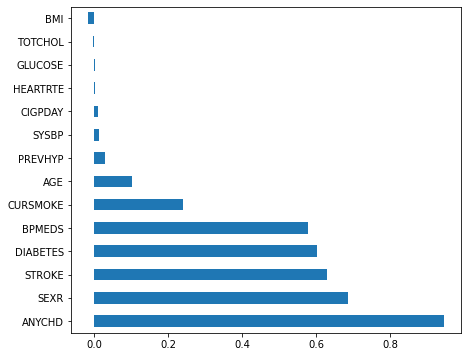

In [56]:
feature_importances.plot(kind='barh', figsize=(7,6))

# DEATH: Period 3

## Train Test Split

In [57]:
x = framinghamP3.drop(['RANDID', 'DIABP', 'DEATH'], axis = 1)
y = framinghamP3['DEATH']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=76)

In [58]:
LR.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [59]:
y_pred = LR.predict(x_test)

In [60]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[513  29]
 [106  50]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88       542
           1       0.63      0.32      0.43       156

    accuracy                           0.81       698
   macro avg       0.73      0.63      0.65       698
weighted avg       0.78      0.81      0.78       698



In [61]:
print(accuracy_score(y_test, y_pred))

0.8065902578796562


## Feature Importance

In [62]:
feature_importances = pd.Series(LR.coef_[0], index=x.columns)
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

ANYCHD      1.179237
SEXR        0.768618
DIABETES    0.691648
STROKE      0.551573
CURSMOKE    0.450585
BPMEDS      0.434291
PREVHYP     0.307959
AGE         0.091798
HEARTRTE    0.014300
CIGPDAY     0.009637
SYSBP       0.004910
GLUCOSE     0.004005
TOTCHOL    -0.003506
BMI        -0.051917
dtype: float64


<AxesSubplot:>

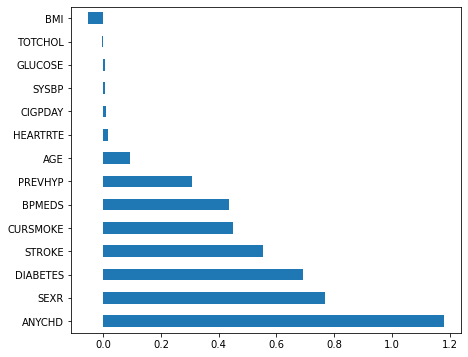

In [63]:
feature_importances.plot(kind='barh', figsize=(7,6))